In [29]:
import pandas as pd
from palette_creator.utils import quantize_image, get_mse
import json
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def load_img(path_img):
    path_img = str(path_img)

    # Check if path exists
    if not Path(path_img).exists():
        print(f"Path {path_img} doesn't exist")
        return None
    
    return cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

def apply_mse(row, palette_type):
    image = row["image"]
    palette = np.array(json.loads(row[palette_type]))
    quantized_image = quantize_image(image, palette)
    return get_mse(image, quantized_image)


In [32]:
df = pd.read_csv("beatriz_gonzalez.csv")

In [33]:
images = [cv2.resize(load_img(path_image), (512, 512)) for path_image in df["path_image"]]

In [34]:
df["image"] = images

In [35]:
%%time
for column in df.columns:
    if "palette" in column:
        method = column.split("_")[0]
        new_col = method+"_mse"
        df[new_col] = df.apply(lambda x: apply_mse(x, column), axis=1)
        print(column, "finished")

kmeans_palette finished
median-cut_palette finished
kmeans+bitcutting_palette finished
median-cut+average-filter_palette finished
kmeans+average-filter_palette finished
pnn-mode+resize_palette finished
pnn-mean+resize_palette finished
neuralnetwork+bitcutting_palette finished
neuralnetwork+train+bitcutting_palette finished
neuralnetwork+fromscratch+bitcutting_palette finished
neuralnetwork+train100+bitcutting_palette finished
CPU times: user 11min 56s, sys: 204 ms, total: 11min 56s
Wall time: 11min 56s


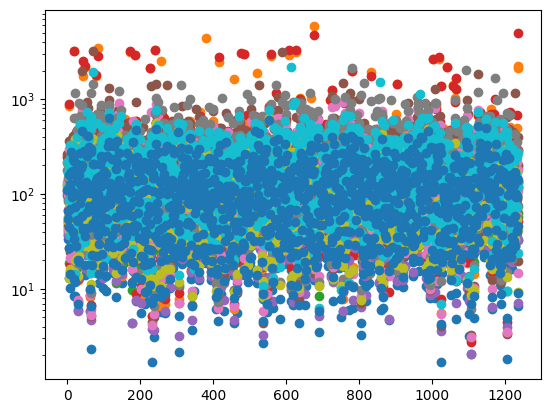

In [36]:
for col in df[[col for col in df.columns if "_mse" in col]]:
    plt.scatter(x=range(len(df)), y=df[col])
    plt.yscale("log")

In [37]:
for col in df[[col for col in df.columns if "_mse" in col]]:
    print(col, df[col].mean())

kmeans_mse 102.40978632399519
median-cut_mse 252.50485831996605
kmeans+bitcutting_mse 111.48260952441616
median-cut+average-filter_mse 257.4386137436973
kmeans+average-filter_mse 111.78884936894019
pnn-mode+resize_mse 224.22596977985734
pnn-mean+resize_mse 166.6325557895675
neuralnetwork+bitcutting_mse 230.1295002488982
neuralnetwork+train+bitcutting_mse 124.44599282568221
neuralnetwork+fromscratch+bitcutting_mse 199.2254836647884
neuralnetwork+train100+bitcutting_mse 112.10790355807683
